In [2]:
import IPython.display as ipd
import glob
from scipy.io import wavfile
import numpy as np
import pandas as pd
import librosa
import librosa.display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib as plt
import matplotlib.pyplot as plt
import struct
from scipy.io import wavfile as wav
from scipy.io.wavfile import write
import os
from datetime import datetime 
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint 

In [3]:
file_name_data='audiodata.csv'
dfdata=pd.read_csv(file_name_data,header=None)
file_name_label='audiolabel.csv'
dflabel=pd.read_csv(file_name_label,header=None)

In [4]:
dfdata

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71911,90,136,169,173,160,130,75,60,82,124,...,37,50,65,77,62,42,31,25,31,45
71912,-59,-46,-39,-29,-2,11,29,19,-7,-27,...,-86,-85,-86,-86,-88,-81,-72,-61,-66,-67
71913,51,48,48,50,52,36,29,13,18,31,...,-22,-42,-62,-67,-70,-65,-61,-48,-42,-37
71914,-66,-56,-47,-55,-64,-64,-58,-48,-42,-43,...,32,26,28,15,34,42,60,73,86,106


In [5]:
dflabel

,0,1
0,Audio_1.wav,0
1,Audio_2.wav,0
2,Audio_3.wav,0
3,Audio_4.wav,0
4,Audio_5.wav,0
...,...,...
71911,Audio_71912.wav,0
71912,Audio_71913.wav,0
71913,Audio_71914.wav,0
71914,Audio_71915.wav,0


In [7]:
dfdata=np.array(dfdata)
dflabel=np.array(dflabel)
print(dflabel)
[m,n]=dfdata.shape
nmfcc=40
dfmfcc=np.zeros((m,nmfcc))

[['Audio_1.wav' 0]
 ['Audio_2.wav' 0]
 ['Audio_3.wav' 0]
 ...
 ['Audio_71914.wav' 0]
 ['Audio_71915.wav' 0]
 ['Audio_71916.wav' 0]]


In [9]:
features=[]
for i in range(0,m):
    write("example.wav", 11025, dfdata[i,:].astype(np.int16))
    nmfcc=40
    hop_length = 512
    n_fft = 1024
    n_mels = 128
    file_name='example.wav'
    y, sr = librosa.load(file_name, res_type='kaiser_fast') 
    audio, _ = librosa.effects.trim(y)
    S = librosa.feature.mfcc(audio, sr=sr, n_fft=n_fft, hop_length=hop_length, center=False, n_mfcc=nmfcc, fmin=0)
    S_DB = librosa.power_to_db(S, ref=np.max)
    mfccsscaled = np.mean(S_DB.T,axis=0)
    dfmfcc[i,:]=mfccsscaled
    features.append([dfmfcc[i,:],dflabel[i,1]])

In [10]:
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])
featuresdf

,feature,class_label
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...
71911,"[-80.0, -0.03559684753417969, -80.0, -8.098464...",0
71912,"[-80.0, -0.0945994034409523, -80.0, -7.3250498...",0
71913,"[-80.0, -0.15297317504882812, -80.0, -6.007670...",0
71914,"[-80.0, -0.1844005584716797, -80.0, -6.2440700...",0


In [50]:
#featuresdf.to_csv(r'mfcc_and_label.csv',index=False,index_label=False)

In [18]:
filecsv=np.zeros((m,nmfcc+1))
filecsv[:,0:nmfcc]=dfmfcc
filecsv[:,nmfcc]=dflabel[:,1]
print(filecsv)
dfcsv = pd.DataFrame (filecsv)
path = 'mfcc_label.xlsx'
dfcsv.to_excel(path, index=False)

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [-80.          -0.15297318 -80.         ... -80.         -39.44086838
    0.        ]
 [-80.          -0.18440056 -80.         ... -80.         -80.
    0.        ]
 [-80.          -0.18890572 -80.         ... -59.21302414 -38.40842819
    0.        ]]


In [ ]:
##############################################################################################################################

In [32]:
class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=6):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        ## x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)
        
        ## (batch_size, seq_len, embed_dim)
        key = self.key_dense(inputs) 
        
        ## (batch_size, seq_len, embed_dim)
        value = self.value_dense(inputs) 
        
        ## (batch_size, seq_len, embed_dim)
        query = self.separate_heads(
            query, batch_size
        )  
        ## (batch_size, num_heads, seq_len, projection_dim)
        key = self.separate_heads(
            key, batch_size
        )  
        ## (batch_size, num_heads, seq_len, projection_dim)
        value = self.separate_heads(
            value, batch_size
        )  
        ## (batch_size, num_heads, seq_len, projection_dim)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(
            attention, perm=[0, 2, 1, 3]
        )  
        ## (batch_size, seq_len, num_heads, projection_dim)
        concat_attention = tf.reshape(
            attention, (batch_size, -1, self.embed_dim)
        )  
        ## (batch_size, seq_len, embed_dim)
        output = self.combine_heads(
            concat_attention
        )  
        ## (batch_size, seq_len, embed_dim)
        return output

In [33]:
class TransformerBlock(layers.Layer):
    ## For calling multihead attention on embedded data and arranging it sequentially and adding other layers.
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.01):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)
        
    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [34]:
class TokenAndPositionEmbedding(layers.Layer):
    ## For preliminary token generation and embedding
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [35]:
## Generating audio data in the word domain to apply transformer
featuresdf=featuresdf.dropna(axis=0)
print(featuresdf)
X = np.array(featuresdf.feature.tolist())
X=X*100000
min_X=-min([min(element) for element in X])
x=X+min_X
x=x.astype(int)
max_len=max([max(element) for element in x])
print(max_len)
# Getting label size
y = np.array(featuresdf.class_label.tolist())
print(x,x.shape)
print(y,y.shape)

                                                 feature  class_label
0      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            0
1      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            0
2      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            0
3      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            0
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            0
...                                                  ...          ...
71911  [-80.0, -0.03559684753417969, -80.0, -8.098464...            0
71912  [-80.0, -0.0945994034409523, -80.0, -7.3250498...            0
71913  [-80.0, -0.15297317504882812, -80.0, -6.007670...            0
71914  [-80.0, -0.1844005584716797, -80.0, -6.2440700...            0
71915  [-80.0, -0.1889057159423828, -80.0, -6.2168769...            0

[71916 rows x 2 columns]
8000000
[[8000000 8000000 8000000 ... 8000000 8000000 8000000]
 [8000000 8000000 8000000 ... 8000000 8000000 8000000]
 [8000000 800000

In [36]:
from sklearn.model_selection import train_test_split 
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,shuffle=False)
m,n=x.shape
print(m,n)
print(y.shape)
x_train=x[0:int(m*9/10),:]
x_test=x[int(m*9/10):m,:]
y_train=y[0:int(m*9/10)]
y_test=y[int(m*9/10):m]

71916 40
(71916,)


In [37]:
## Changing data type for transformer layers
m,n=x_test.shape
print(m,n)

## Converting form and reshaping
TestX=x_test
TestY=y_test
testy=np.reshape(TestY,(m,))

## Changing datatypes
testx=np.empty((m,),object)
for i in range (0,m):
    testx[i]=list(int(v) for v in TestX[i])
    testy[i]=testy[i].astype(int)

## Printing data-types - relevant to transformer input
print(type(testx))
print(type(testx[m-1][n-1]))
print(type(testx[m-1]))
print(type(testy[m-1]))
print(type(testy))

## Converting Train Data and Getting size of data
m,n=x_train.shape
print(m,n)

## Converting form and reshaping
TrainX=x_train
TrainY=y_train
trainy=np.reshape(TrainY,(m,))

## Changing datatypes
trainx=np.empty((m,),object)
for i in range (0,m):
    trainx[i]=list(int(v) for v in TrainX[i])
    trainy[i]=TrainY[i].astype(int)
    
## Printing data-types - relevant to transformer input
print(type(trainx))
print(type(trainx[m-1][n-1]))
print(type(trainx[m-1]))
print(type(trainy[m-1]))
print(type(trainy))
print(trainx.shape,trainy.shape,testx.shape,testy.shape)

7192 40
<class 'numpy.ndarray'>
<class 'int'>
<class 'list'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>
64724 40
<class 'numpy.ndarray'>
<class 'int'>
<class 'list'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>
(64724,) (64724,) (7192,) (7192,)


In [38]:
vocab_size = max_len+1
maxlen = 40
print(len(trainx), "Training sequences")
print(len(testx), "Validation sequences")

## Converting to padded tensor sequence
trainx = keras.preprocessing.sequence.pad_sequences(trainx,maxlen=maxlen)
testx = keras.preprocessing.sequence.pad_sequences(testx,maxlen=maxlen)
print(trainx.shape,trainy.shape,testx.shape,testy.shape)
print(trainx,trainy,testx,testy)

64724 Training sequences
7192 Validation sequences
(64724, 40) (64724,) (7192, 40) (7192,)
[[8000000 8000000 8000000 ... 8000000 8000000 8000000]
 [8000000 8000000 8000000 ... 8000000 8000000 8000000]
 [8000000 8000000 8000000 ... 8000000 8000000 8000000]
 ...
 [      0 7941571       0 ... 6350569 6301741 6052386]
 [      0 7996376       0 ... 6221349 5976445 6411503]
 [      0 7981751       0 ... 3797697 3917446 6544237]] [0 0 0 ... 0 0 0] [[      0 7952578       0 ... 4035311 6186128 6445218]
 [      0 7981283       0 ... 1902946 4320971 5878992]
 [      0 7969698       0 ... 2075936 6544528 4098233]
 ...
 [      0 7984702       0 ... 4048786       0 4055913]
 [      0 7981559       0 ... 3673876       0       0]
 [      0 7981109       0 ... 5156304 2078697 4159157]] [0 0 0 ... 0 0 0]


In [40]:
vocab_size=8000001
maxlen=40
embed_dim = 30  ## Embedding size for each token
num_heads = 6  ## Number of attention heads
ff_dim = 30  ## Hidden layer size in feed forward network inside transformer

## Tokenizing input data with max dimension and embedding it
inputs = layers.Input(shape=(maxlen,))
#x = keras.Sequential()
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)

## Adding Sequential layer to the embedded data and attention layers too.
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)

## Add other layers
x = layers.Conv1D(6,3,padding="same")(x)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.MaxPool1D(pool_size=2, strides=2)(x)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dropout(0.5)(x)

## Producing general softmax layer for classification
outputs = layers.Dense(8, activation="softmax")(x)

## Generating model
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 40)]              0         
_________________________________________________________________
token_and_position_embedding (None, 40, 30)            240001230 
_________________________________________________________________
transformer_block_1 (Transfo (None, 40, 30)            5700      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40, 6)             546       
_________________________________________________________________
dense_18 (Dense)             (None, 40, 30)            210       
_________________________________________________________________
dropout_9 (Dropout)          (None, 40, 30)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 20, 30)            0   

In [45]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(trainx, trainy, batch_size=100, epochs=3,validation_data=(testx, testy))

Epoch 1/5
648/648 [==============================] - 1323s 2s/step - loss: 1.0456 - accuracy: 0.7415 - val_loss: 0.6672 - val_accuracy: 0.8432
Epoch 2/5
648/648 [==============================] - 1335s 2s/step - loss: 0.5726 - accuracy: 0.8620 - val_loss: 0.7639 - val_accuracy: 0.8432
Epoch 3/5
648/648 [==============================] - 1332s 2s/step - loss: 0.3297 - accuracy: 0.8720 - val_loss: 0.7954 - val_accuracy: 0.8379
Epoch 4/5
648/648 [==============================] - 1331s 2s/step - loss: 0.2534 - accuracy: 0.9054 - val_loss: 1.9048 - val_accuracy: 0.3172
Epoch 5/5
648/648 [==============================] - 1295s 2s/step - loss: 0.2376 - accuracy: 0.9113 - val_loss: 1.5169 - val_accuracy: 0.5115


In [46]:
score = model.evaluate(trainx, trainy, verbose=0)
print("Training Performance",score)
score = model.evaluate(testx, testy, verbose=0)
print("Testing Performanr",score)

Training Performance [0.22000133991241455, 0.9112384915351868]
Testing Performanr [1.51686692237854, 0.5115405917167664]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


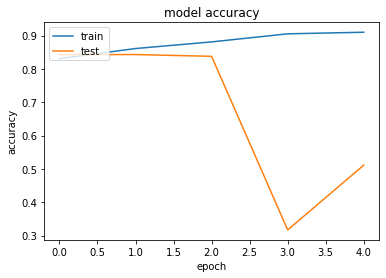

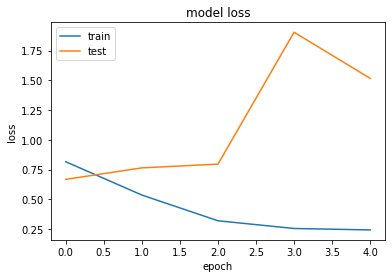

In [47]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
del model
keras.backend.clear_session()